In [1]:
import pandas as pd
import tensorflow as tf
import re
import nltk
import preprocessor as p
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split


2023-04-06 10:23:16.237098: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 10:23:16.509208: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-06 10:23:16.509232: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-06 10:23:17.353821: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
df = pd.read_csv('./datasets/short.csv')
df.head()
df = df.sample(frac=0.4)

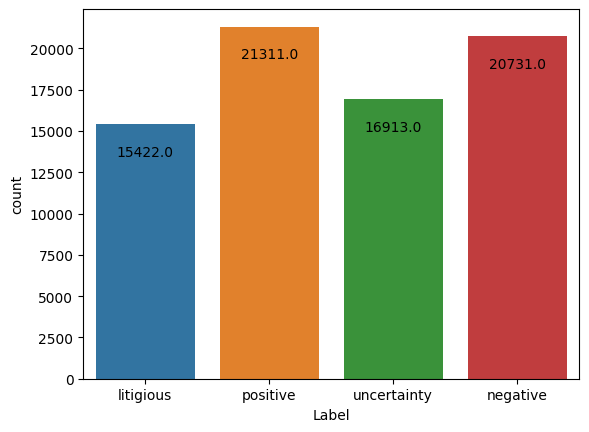

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load example data
plt.close("all")

# Create countplot
ax = sns.countplot(x="Label", data=df)

# Add count values to the plot
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -20), 
                textcoords = 'offset points')

# Show the plot
plt.show()

In [4]:
def clean_text(text):    
    text = re.sub(r"http[^ ]* ", '', text)
    text = re.sub(r"#\S* ", '', text)
    text = re.sub(r"@\S* ", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"\s\s+", ' ', text)
    text = text.lower()
    return text

In [5]:
texts = [clean_text(x) for x in df['Text']]
classes = ['Positive', 'Negative', 'Litigious', 'Uncertainty']
labels = []
for s in df['Label']:
    arr = np.zeros(4)
    i = 0
    if s == 'negative':
        i = 1
    elif s == 'litigious':
        i = 2
    elif s == 'uncertainty':
        i = 3
    arr[i] = 1.0
    labels.append(arr)
        

In [6]:
vocab_size = 20000
embedding_dim = 32
max_length = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.20, random_state=93)



tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [8]:
models = []
data = []
total_epochs = 8

# Simple ANN Model

In [9]:
models.append("Simple ANN")
simple_ann_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])
simple_ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
simple_ann_model.summary()

# model = tf.keras.models.load_model('./saved_models/classifier2LaksData3rd.h5',compile = False)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 32)           640000    
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense (Dense)               (None, 128)               1228928   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1,869,444
Trainable params: 1,869,444
Non-trainable params: 0
_________________________________________________________________


2023-04-06 10:23:23.604926: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-06 10:23:23.605031: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-04-06 10:23:23.605074: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-04-06 10:23:23.605116: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-04-06 10:23:23.605159: W tensorfl

In [10]:
simple_ann_model_history = simple_ann_model.fit(X_train, y_train, epochs=total_epochs, validation_data=(X_test, y_test), verbose=1)


Epoch 1/8
1860/1860 [==============================] - 50s 26ms/step - loss: 0.1488 - accuracy: 0.8766 - val_loss: 0.0678 - val_accuracy: 0.9562
Epoch 2/8
1860/1860 [==============================] - 49s 27ms/step - loss: 0.0390 - accuracy: 0.9758 - val_loss: 0.0756 - val_accuracy: 0.9524
Epoch 3/8
1860/1860 [==============================] - 49s 27ms/step - loss: 0.0212 - accuracy: 0.9877 - val_loss: 0.0863 - val_accuracy: 0.9510
Epoch 4/8
1860/1860 [==============================] - 49s 27ms/step - loss: 0.0116 - accuracy: 0.9937 - val_loss: 0.0992 - val_accuracy: 0.9462
Epoch 5/8
1860/1860 [==============================] - 48s 26ms/step - loss: 0.0075 - accuracy: 0.9963 - val_loss: 0.1197 - val_accuracy: 0.9452
Epoch 6/8
1860/1860 [==============================] - 48s 26ms/step - loss: 0.0053 - accuracy: 0.9975 - val_loss: 0.1365 - val_accuracy: 0.9411
Epoch 7/8
1860/1860 [==============================] - 48s 26ms/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.1387 - val_ac

465/465 [==============================] - 1s 2ms/step


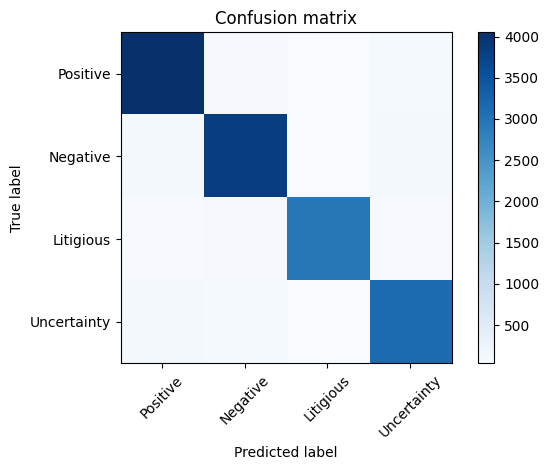

In [11]:
y_pred = tf.argmax(simple_ann_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

import matplotlib.pyplot as plt
plt.close("all")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()



In [12]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Obtain the predicted probabilities for each input instance
y_pred_prob = simple_ann_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='micro')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='micro')

# Calculate the accuracy score
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

data.append(["Simpe ANN", f1, precision, recall, accuracy])
# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)


465/465 [==============================] - 1s 2ms/step
F1 score: 0.9402
Precision: 94.29%
Recall Score: 0.94
Accuracy: 0.9369454154342565


In [13]:
vals = ["Positive", "Negative", "Litigious", "Uncertain", "Neutral"]
def prediction(model, s):
    sequences = tokenizer.texts_to_sequences([s])
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    print(type(padded))
    x = model.predict(padded)[0]
    max_index = 0
    for i in range(0,4):
        if x[i] > x[max_index]:
            max_index = i
    
    if x[max_index] < 0.3:
        max_index = 4
    print(f"The sentence is {vals[max_index]}")
    
    return x

In [14]:
prediction(simple_ann_model, "this is great stuff")

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 22ms/step
The sentence is Positive


array([0.92187655, 0.02668929, 0.00416471, 0.01543226], dtype=float32)

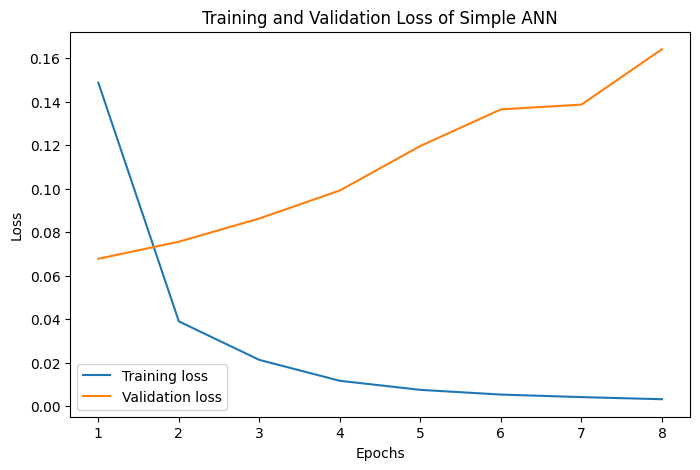

In [15]:
import matplotlib.pyplot as plt
plt.close('all')
train_loss = simple_ann_model_history.history['loss']
val_loss = simple_ann_model_history.history['val_loss']
fig, ax = plt.subplots(figsize=(8, 5))
epochs = range(1, len(train_loss) + 1)
ax.plot(epochs, train_loss, label='Training loss')
ax.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss of Simple ANN')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

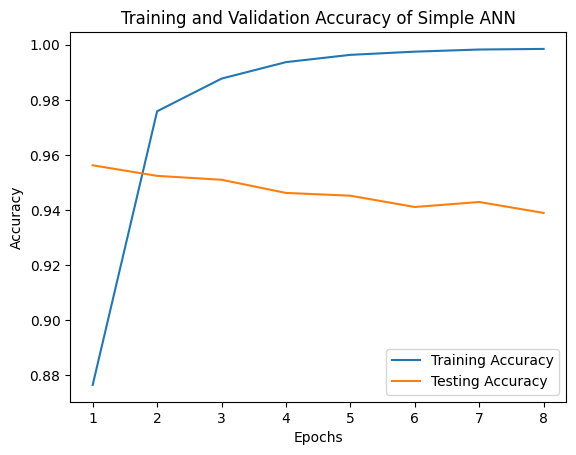

In [16]:

# Retrieve accuracy values from history object
plt.close('all')

train_acc = simple_ann_model_history.history['accuracy']
test_acc = simple_ann_model_history.history['val_accuracy']

# Retrieve number of epochs
epochs = range(1, len(train_acc) + 1)

# Plot training and testing accuracy values
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, test_acc, label='Testing Accuracy')
plt.title('Training and Validation Accuracy of Simple ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# CNN Model

In [17]:
from keras.layers import Conv1D,MaxPooling1D,BatchNormalization,Dropout,GlobalMaxPooling1D,Dense
from tensorflow.keras.initializers import RandomNormal, Constant

In [18]:
# Neural Network architecture

models.append("CNN")

cnn_model = tf.keras.Sequential()

embedding_layer = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length)

cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(156, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=3,strides=1, padding='same'))
cnn_model.add(BatchNormalization(momentum=0.95, epsilon=0.005,beta_initializer=RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=Constant(value=0.9)))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(4, activation='sigmoid'))


cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 32)           640000    
                                                                 
 conv1d (Conv1D)             (None, 296, 156)          25116     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 296, 156)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 296, 156)         624       
 ormalization)                                                   
                                                                 
 global_max_pooling1d (Globa  (None, 156)              0         
 lMaxPooling1D)                                                  
                                                      

In [19]:
cnn_model_history = cnn_model.fit(X_train, y_train, batch_size = 156, epochs=total_epochs, validation_data=(X_test, y_test))

Epoch 1/8
382/382 [==============================] - 124s 323ms/step - loss: 0.1481 - acc: 0.8698 - val_loss: 0.0481 - val_acc: 0.9632
Epoch 2/8
382/382 [==============================] - 118s 309ms/step - loss: 0.0436 - acc: 0.9708 - val_loss: 0.0490 - val_acc: 0.9643
Epoch 3/8
382/382 [==============================] - 107s 280ms/step - loss: 0.0302 - acc: 0.9822 - val_loss: 0.0547 - val_acc: 0.9624
Epoch 4/8
382/382 [==============================] - 109s 284ms/step - loss: 0.0204 - acc: 0.9891 - val_loss: 0.0634 - val_acc: 0.9579
Epoch 5/8
382/382 [==============================] - 108s 283ms/step - loss: 0.0132 - acc: 0.9936 - val_loss: 0.0717 - val_acc: 0.9574
Epoch 6/8
382/382 [==============================] - 107s 280ms/step - loss: 0.0095 - acc: 0.9959 - val_loss: 0.0771 - val_acc: 0.9586
Epoch 7/8
382/382 [==============================] - 107s 281ms/step - loss: 0.0073 - acc: 0.9970 - val_loss: 0.0838 - val_acc: 0.9579
Epoch 8/8
382/382 [==============================] - 10

465/465 [==============================] - 3s 6ms/step


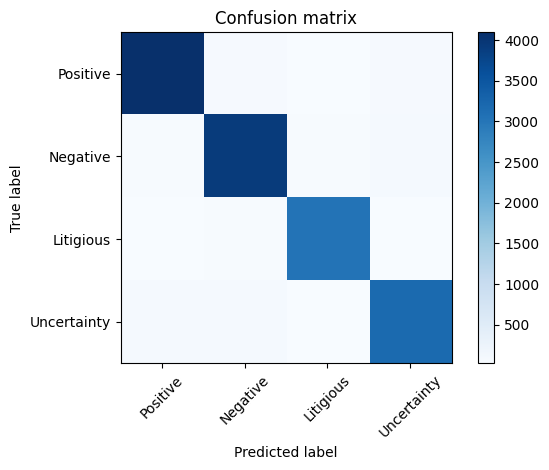

In [20]:
y_pred = tf.argmax(cnn_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

import matplotlib.pyplot as plt
plt.close("all")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()



In [21]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Obtain the predicted probabilities for each input instance
y_pred_prob = cnn_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='micro')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='micro')

# Calculate the accuracy score
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

data.append(["CNN", f1, precision, recall, accuracy])


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)


465/465 [==============================] - 3s 6ms/step
F1 score: 0.9563
Precision: 96.15%
Recall Score: 0.95
Accuracy: 0.9513982253293897


In [22]:
cnn_model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

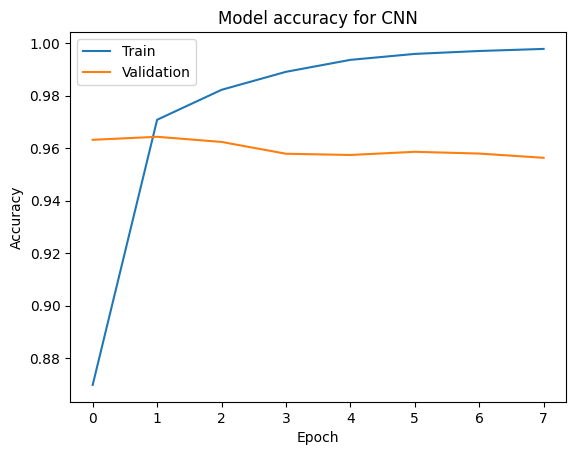

In [23]:
# Plot the training and validation accuracy over epochs
plt.close('all')
plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])
plt.title('Model accuracy for CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


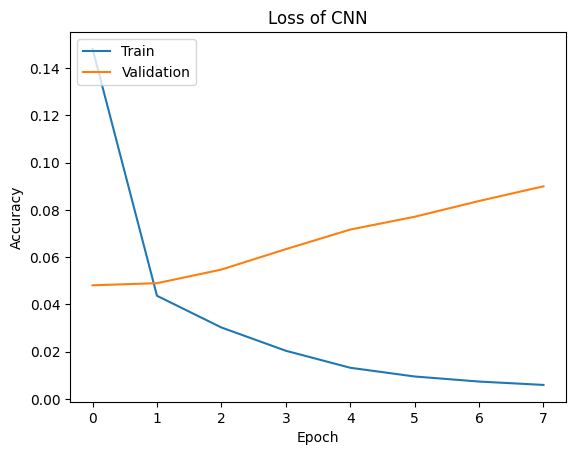

In [24]:
# Plot the training and validation accuracy over epochs
plt.close('all')
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.title('Loss of CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Random Forest Classifier


Accuracy: 74.00%


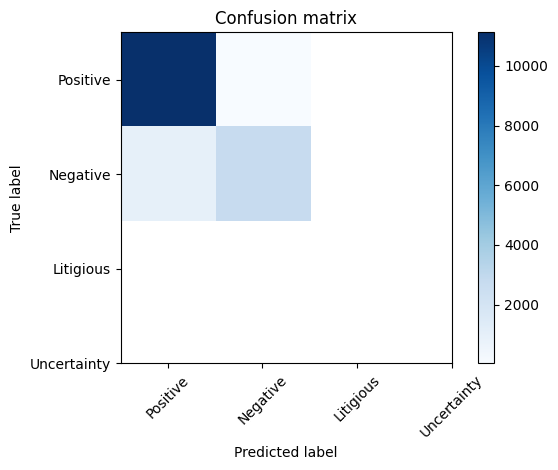

In [25]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import string
from sklearn.metrics import multilabel_confusion_matrix



# Load your data
data_ = df['Text']
# labels = # your labels as a list

# Tokenize and clean the data
clean_data = [clean_text(text) for text in data_]

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(clean_data, labels, test_size=0.2, random_state=42)

# Create a bag-of-words representation of the training data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train_new)

# Create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the random forest classifier to the training data
rfc.fit(X_train_bow, y_train_new)

# Vectorize the test data using the same CountVectorizer object
X_test_bow = vectorizer.transform(X_test_new)

# Make predictions on the test data
y_pred_new = rfc.predict(X_test_bow)

# Evaluate the performance of the classifier by calculating the accuracy
accuracy_random_forest = accuracy_score(y_test_new, y_pred_new)

# Print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy_random_forest * 100))

# y_pred = rfc.predict(X_test_new)

cm = multilabel_confusion_matrix(y_test_new, y_pred_new)
cm = np.mean(cm, axis=0)

plt.close('all')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


In [26]:
def predict(text):
    # Clean the text
    clean_text_ = clean_text(text)
    # Vectorize the cleaned text using the CountVectorizer
    x = vectorizer.transform([clean_text_])
    # Make a prediction using the trained random forest classifier
    y_pred = rfc.predict(x)[0]
    # Return the predicted label
    return y_pred



# BILSTM

In [27]:
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding
from tensorflow.keras.models import Sequential

models.append("BiLSTM")

bilstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

# Compile the model
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# bilstm_model_history = bilstm_model.fit(X_train, y_train, epochs=4, batch_size=32)
bilstm_model_history = bilstm_model.fit(X_train, y_train, batch_size=128, epochs=total_epochs, verbose=1, validation_data=(X_test, y_test))



Epoch 1/8
465/465 [==============================] - 155s 326ms/step - loss: 0.2880 - accuracy: 0.7312 - val_loss: 0.0814 - val_accuracy: 0.9488
Epoch 2/8
465/465 [==============================] - 151s 324ms/step - loss: 0.0645 - accuracy: 0.9579 - val_loss: 0.0596 - val_accuracy: 0.9578
Epoch 3/8
465/465 [==============================] - 151s 324ms/step - loss: 0.0455 - accuracy: 0.9694 - val_loss: 0.0617 - val_accuracy: 0.9543
Epoch 4/8
465/465 [==============================] - 177s 380ms/step - loss: 0.0355 - accuracy: 0.9768 - val_loss: 0.0605 - val_accuracy: 0.9570
Epoch 5/8
465/465 [==============================] - 174s 375ms/step - loss: 0.0304 - accuracy: 0.9810 - val_loss: 0.0640 - val_accuracy: 0.9565
Epoch 6/8
465/465 [==============================] - 175s 377ms/step - loss: 0.0239 - accuracy: 0.9849 - val_loss: 0.0675 - val_accuracy: 0.9558
Epoch 7/8
465/465 [==============================] - 164s 353ms/step - loss: 0.0206 - accuracy: 0.9871 - val_loss: 0.0689 - val_ac

In [28]:
loss, accuracy = bilstm_model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


465/465 [==============================] - 13s 29ms/step - loss: 0.0791 - accuracy: 0.9538
Test accuracy: 0.9537510275840759


465/465 [==============================] - 14s 30ms/step


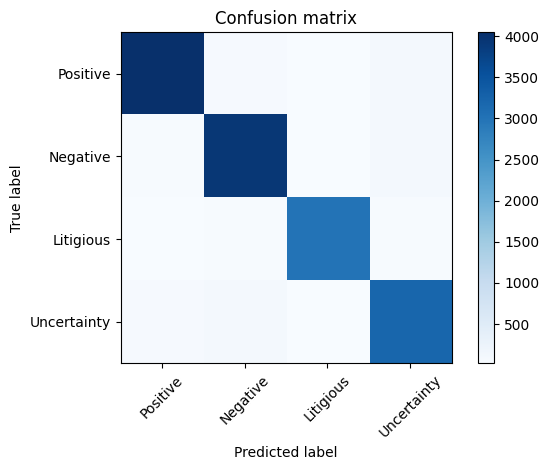

In [29]:
y_pred = tf.argmax(bilstm_model.predict(X_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

import matplotlib.pyplot as plt
plt.close("all")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()



In [30]:
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Obtain the predicted probabilities for each input instance
y_pred_prob = bilstm_model.predict(X_test)

# Apply a threshold to convert the probabilities to binary labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='micro')

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='micro')

# Calculate the accuracy score
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

data.append(["BiLSTM", f1, precision, recall, accuracy])


# Print the scores
print('F1 score: {:.4f}'.format(f1))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall Score: {:.2f}".format(recall))
print("Accuracy:", accuracy)


465/465 [==============================] - 15s 31ms/step
F1 score: 0.9550
Precision: 96.00%
Recall Score: 0.95
Accuracy: 0.9535493412207583


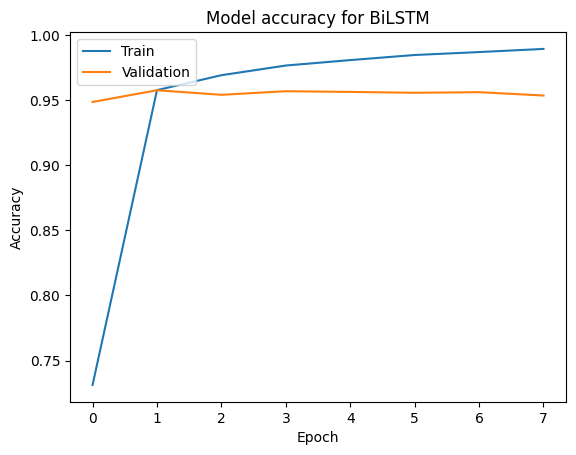

In [31]:
# Plot the training and validation accuracy over epochs
plt.close('all')
plt.plot(bilstm_model_history.history['accuracy'])
plt.plot(bilstm_model_history.history['val_accuracy'])
plt.title('Model accuracy for BiLSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


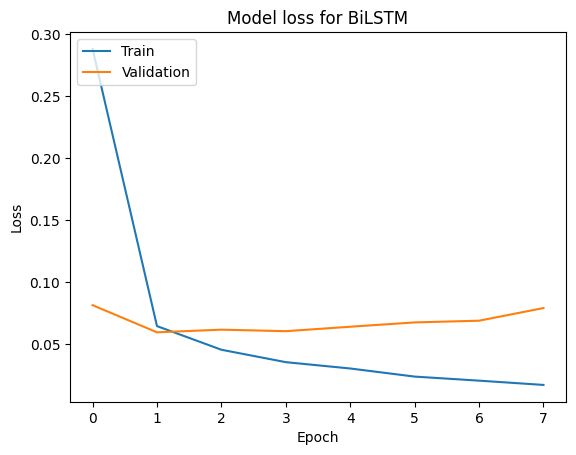

In [32]:
# Plot the training and validation loss over epochs
plt.close('all')
plt.plot(bilstm_model_history.history['loss'])
plt.plot(bilstm_model_history.history['val_loss'])
plt.title('Model loss for BiLSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
# Prediction function
def predict_sentiment( text):
    # Preprocess input text
    text = clean_text(text)
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    # Make prediction
    prediction = bilstm_model.predict(padded)
    # Get predicted sentiment label
    sentiment_label = labels[np.argmax(prediction)]
    # Get predicted sentiment probability
    sentiment_prob = np.max(prediction)
    # Return predicted label and probability
    return sentiment_label, sentiment_prob

In [34]:
y_train[0].shape

(4,)

# Results

In [35]:
train_acc = []
val_acc = []
train_loss = []
val_loss = []

train_acc.append(simple_ann_model_history.history['accuracy'])
val_acc.append(simple_ann_model_history.history['val_accuracy'])
train_loss.append(simple_ann_model_history.history['loss'])
val_loss.append(simple_ann_model_history.history['val_loss'])

train_acc.append(cnn_model_history.history['acc'])
val_acc.append(cnn_model_history.history['val_acc'])
train_loss.append(cnn_model_history.history['loss'])
val_loss.append(cnn_model_history.history['val_loss'])

train_acc.append(bilstm_model_history.history['accuracy'])
val_acc.append(bilstm_model_history.history['val_accuracy'])
train_loss.append(bilstm_model_history.history['loss'])
val_loss.append(bilstm_model_history.history['val_loss'])

In [36]:
models.append("Random Forest")


In [37]:
import pandas as pd

accuracy = []
accuracy.append(max(simple_ann_model_history.history['val_accuracy']))
accuracy.append(max(cnn_model_history.history['val_acc']))
accuracy.append(max(bilstm_model_history.history['val_accuracy']))
accuracy.append(accuracy_random_forest)


# Sample data
accuracy = np.array(accuracy)

# Convert to percent with one decimal place
accuracy = np.round(accuracy * 100, 1)

metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
})

# Set Model column as index
metrics = metrics.set_index('Model')

# Display DataFrame
print(metrics)


# Print the results



               Accuracy
Model                  
Simple ANN         95.6
CNN                96.4
BiLSTM             95.8
Random Forest      74.0


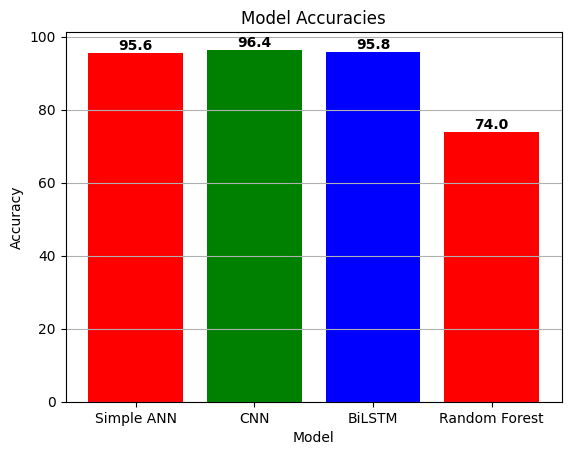

In [38]:
import matplotlib.pyplot as plt


# Create a bar chart
plt.close('all')
colors = ['red', 'green', 'blue']
plt.bar(models, accuracy, color=colors)

# Add horizontal grid lines
plt.grid(True, axis='y')

# Add a title and axis labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels
# plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(accuracy):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()


In [39]:
bilstm_model_history.history['accuracy']

[0.7312313914299011,
 0.9578662514686584,
 0.9693618416786194,
 0.9767903089523315,
 0.9809750914573669,
 0.9848909974098206,
 0.9871430993080139,
 0.9895632266998291]

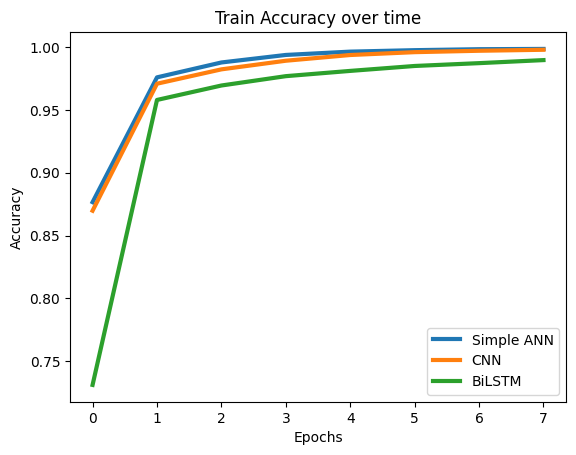

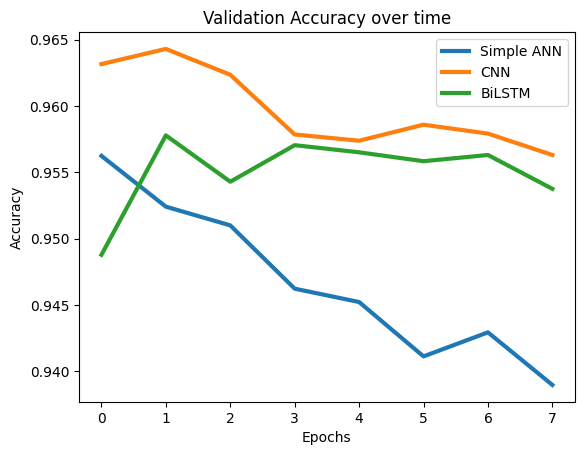

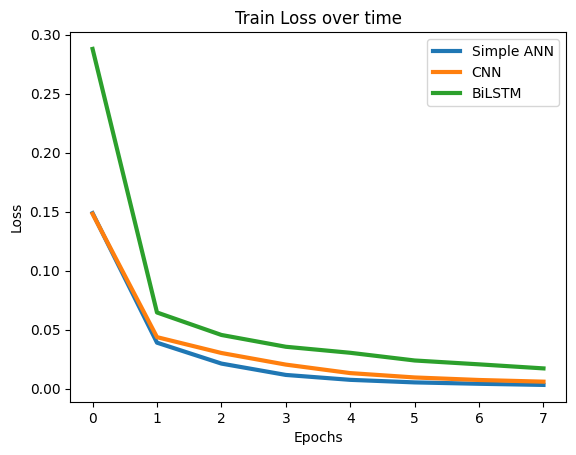

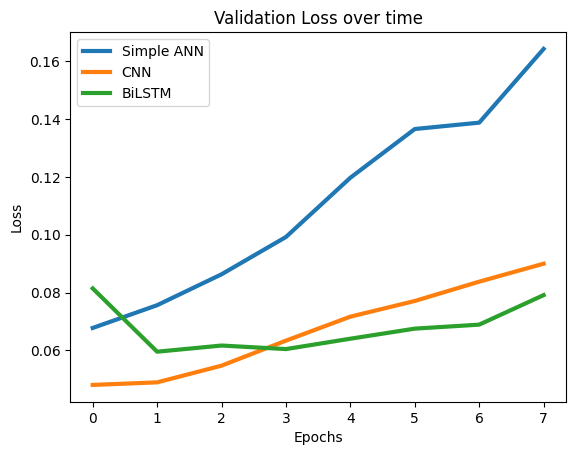

In [40]:
import sys
plt.close('all')

# Create the plot for train accuracy
x = range(len(train_acc[0]))
# print(x)
# sys.exit()
fig1 = plt.figure()
plt.plot(x, train_acc[0], label="Simple ANN", linewidth=3)
plt.plot(x, train_acc[1], label="CNN", linewidth=3)
plt.plot(x, train_acc[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy over time')


# Create the plot for validation accuracy
fig2 = plt.figure()
plt.plot(x, val_acc[0], label="Simple ANN", linewidth=3)
plt.plot(x, val_acc[1], label="CNN", linewidth=3)
plt.plot(x, val_acc[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over time')

# Create the plot for train loss
fig3 = plt.figure()
plt.plot(x, train_loss[0], label="Simple ANN", linewidth=3)
plt.plot(x, train_loss[1], label="CNN", linewidth=3)
plt.plot(x, train_loss[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss over time')

# Create the plot for validation loss
fig4 = plt.figure()
plt.plot(x, val_loss[0], label="Simple ANN", linewidth=3)
plt.plot(x, val_loss[1], label="CNN", linewidth=3)
plt.plot(x, val_loss[2], label="BiLSTM", linewidth=3)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss over time')

# Show all the plots
plt.show()


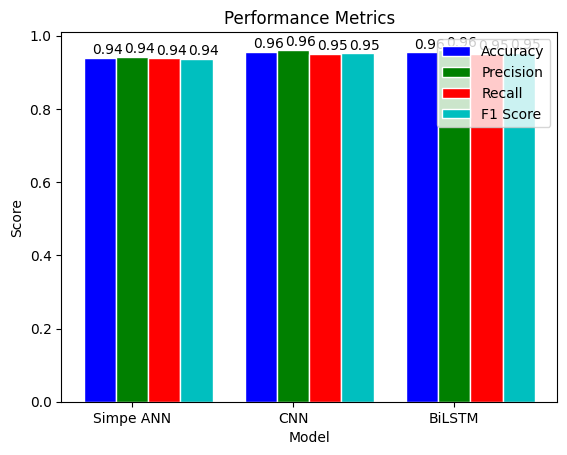

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# example data
# data = [
#     ('Model A', 0.9, 0.8, 0.7, 0.75),
#     ('Model B', 0.8, 0.75, 0.85, 0.8),
#     ('Model C', 0.7, 0.65, 0.75, 0.7)
# ]

# extract the accuracy, precision, recall, and f1 values for each model
accuracy = [x[1] for x in data]
precision = [x[2] for x in data]
recall = [x[3] for x in data]
f1 = [x[4] for x in data]

# set the width of the bars
barWidth = 0.2

# set the positions of the bars on the x-axis
r1 = np.arange(len(data))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# create the bar chart
plt.bar(r1, accuracy, color='b', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='g', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='r', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, f1, color='c', width=barWidth, edgecolor='white', label='F1 Score')

# add labels and titles
plt.xlabel('Model')
plt.xticks([r + barWidth for r in range(len(data))], [x[0] for x in data])
plt.ylabel('Score')
plt.title('Performance Metrics')

# add legend
plt.legend()

# add text labels above each bar
for i in range(len(data)):
    plt.text(r1[i] - 0.05, accuracy[i] + 0.01, '{:.2f}'.format(accuracy[i]), fontsize=10)
    plt.text(r2[i] - 0.05, precision[i] + 0.01, '{:.2f}'.format(precision[i]), fontsize=10)
    plt.text(r3[i] - 0.05, recall[i] + 0.01, '{:.2f}'.format(recall[i]), fontsize=10)
    plt.text(r4[i] - 0.05, f1[i] + 0.01, '{:.2f}'.format(f1[i]), fontsize=10)

# show the plot
plt.show()


introduction 5page
literature work 5-8page
proposed work- description of work done, steps : 10-15 pages
result analysis: define the reuslts model wise 5-8pages
conclusion and future work
refrences 15-20refs 


make a presentation of about 25-30 slides
